### Testing the effect of the number of neighbors

In this notebook, we reproduce Figure S19 and test how the number of neighbors affects the constructed hierarchy. In this notebook we will use the latent space we learned earlier. You can either learn the latent space yourself [here](https://github.com/lcmmichielsen/treeArches-reproducibility/blob/main/Figure4-across%20species/Figure4%2C%20S9.ipynb) or download the latent space from [Zenodo](https://doi.org/10.5281/zenodo.6786357) 

In [1]:
import scanpy as sc
import pandas as pd

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import torch
import scarches as sca
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import gdown
import time as tm

sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(6, 6))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

matplotlib.rcParams['pdf.fonttype'] = 42

Global seed set to 0


In [2]:
latent_all = sc.read('surgery_model/full_latent.h5ad')
latent_all

AnnData object with n_obs × n_vars = 305638 × 10
    obs: 'species', 'Class', 'Subclass', 'RNA_cluster', 'Cross_species', 'leiden', 'ref_query'
    uns: 'Class_colors', 'Cross_species_colors', 'Subclass_colors', 'leiden', 'neighbors', 'species_colors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [3]:
latent_all.obs['subclass_batch'] = np.char.add(np.char.add(np.array(latent_all.obs['Subclass'], dtype= str), '-'),
                                             np.array(latent_all.obs['species'], dtype=str))


In [4]:
idx = np.where(latent_all.obs['Class'] == 'GABAergic')[0]
latent_GABA = latent_all[idx]

5
Starting tree:


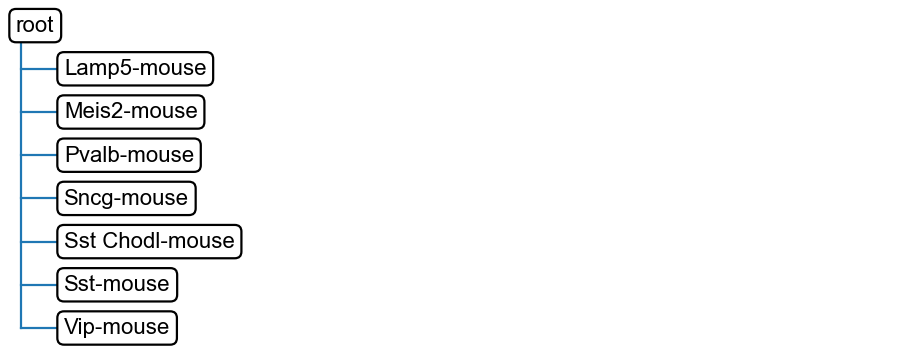


Adding dataset marmoset to the tree

Updated tree:


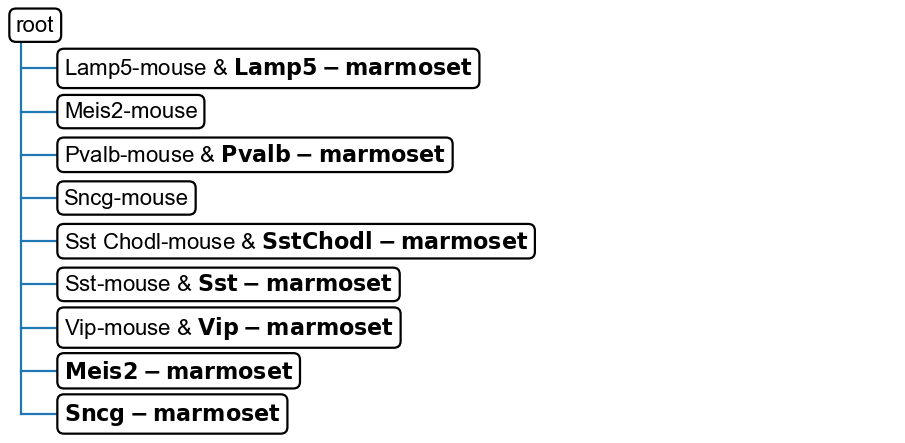


Adding dataset human to the tree

Updated tree:


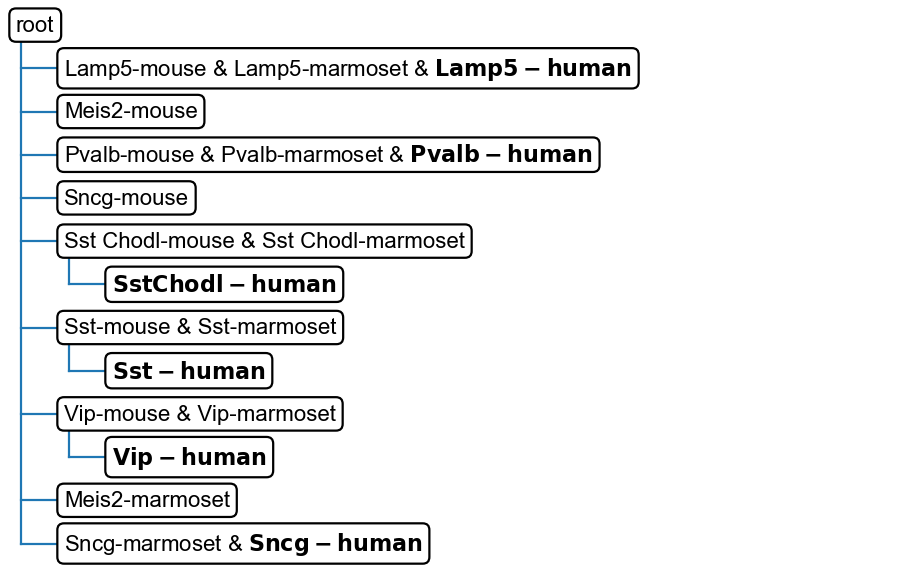

96.64256930351257
10
Starting tree:


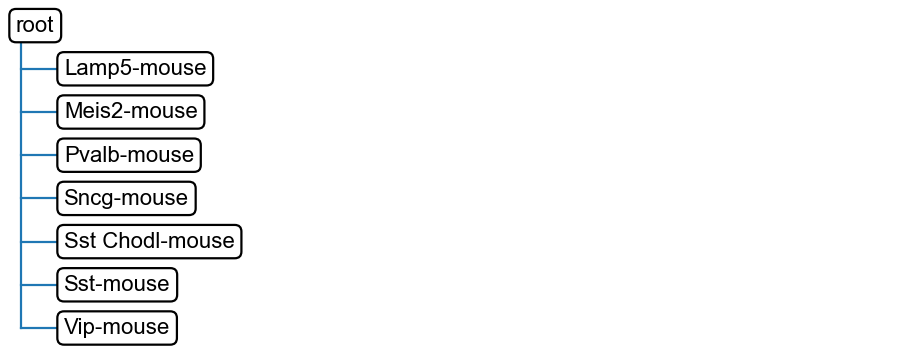


Adding dataset marmoset to the tree

Updated tree:


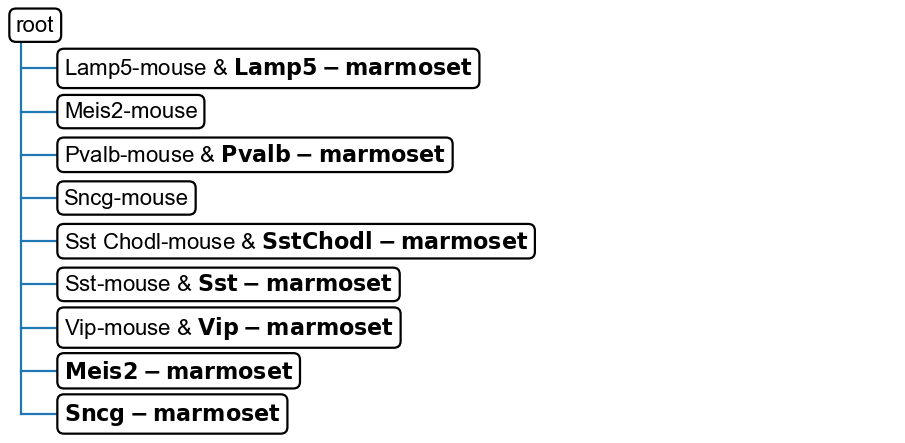


Adding dataset human to the tree

Updated tree:


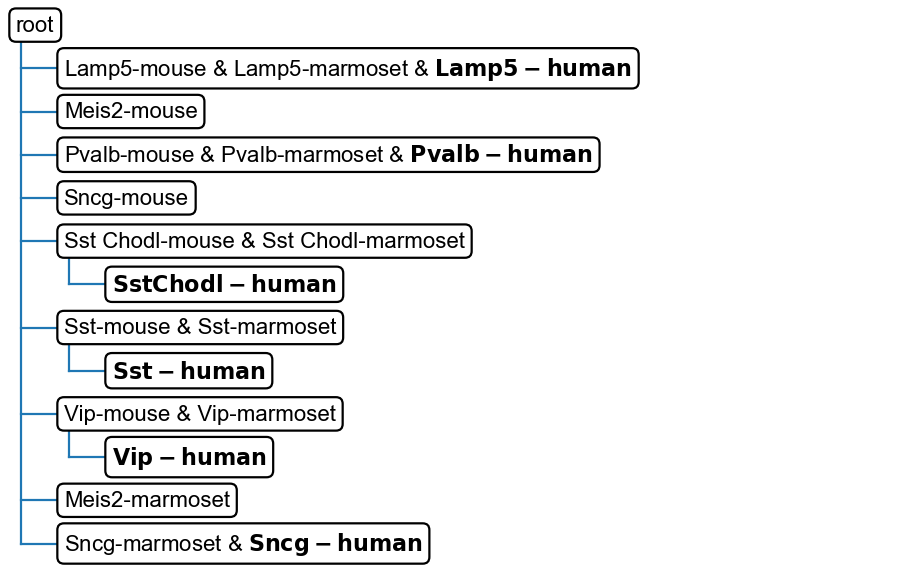

99.71523022651672
20
Starting tree:


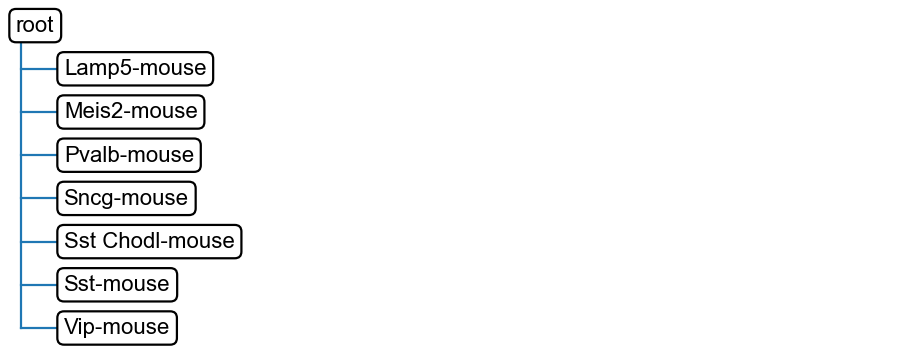


Adding dataset marmoset to the tree

Updated tree:


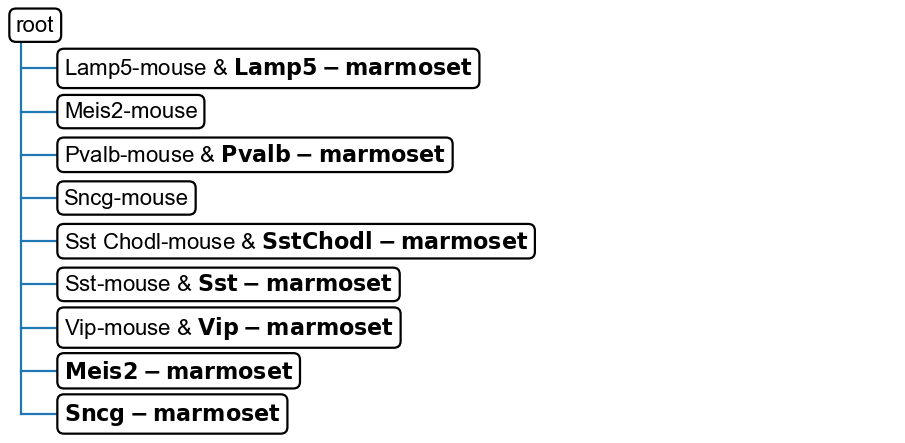


Adding dataset human to the tree

Updated tree:


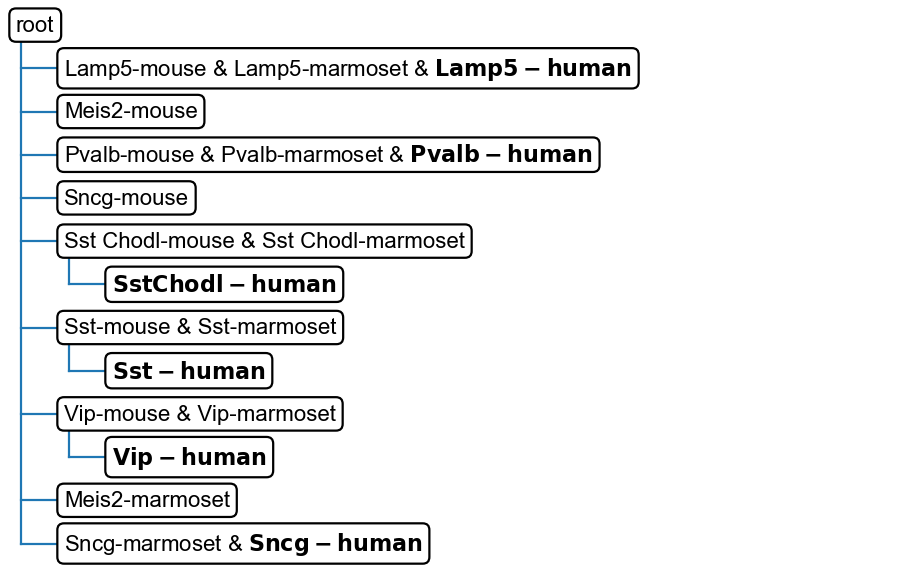

112.56706953048706
50
Starting tree:


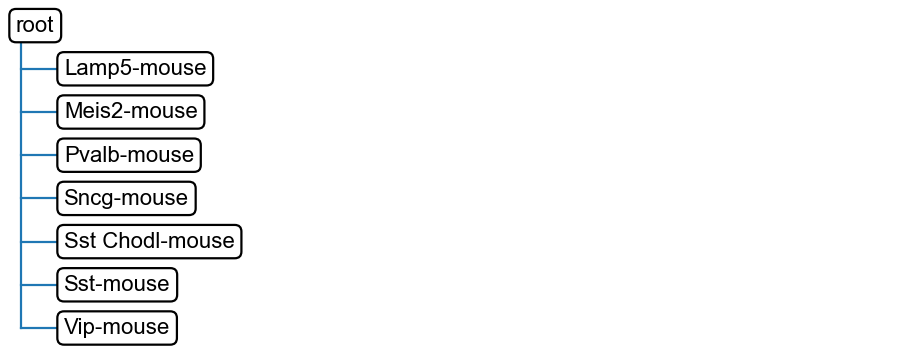


Adding dataset marmoset to the tree

Updated tree:


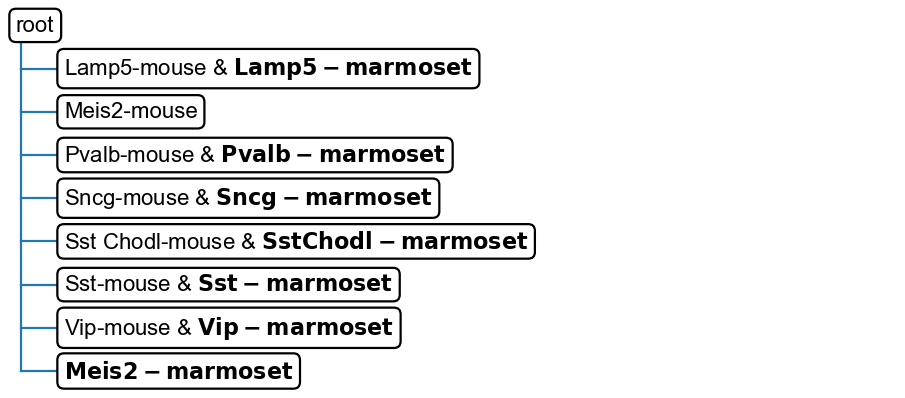


Adding dataset human to the tree

Updated tree:


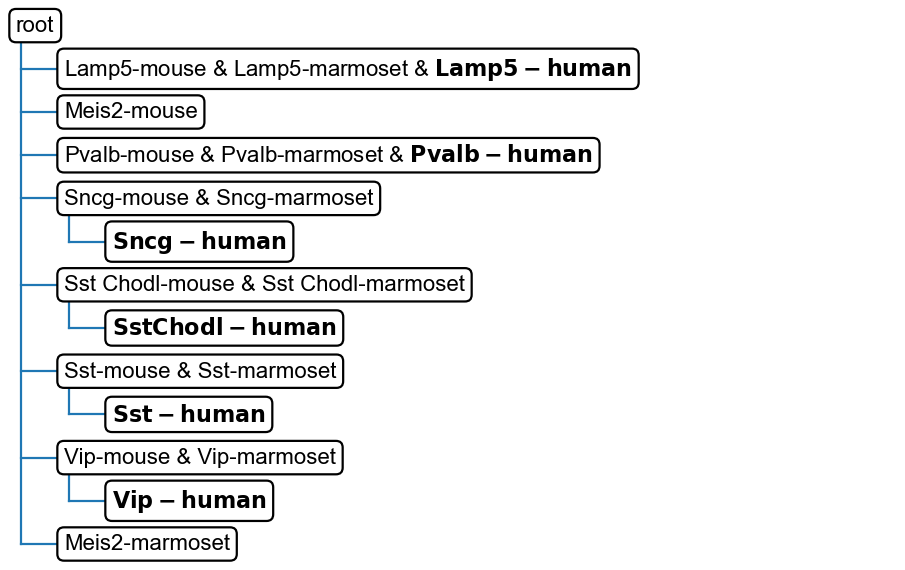

137.32491087913513
100
Starting tree:


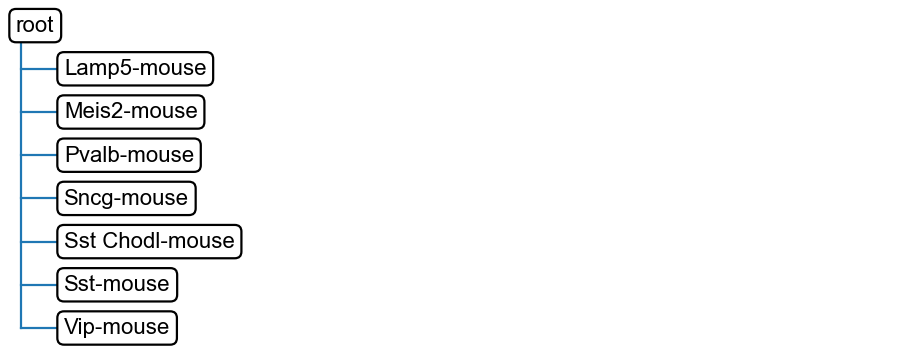


Adding dataset marmoset to the tree

Updated tree:


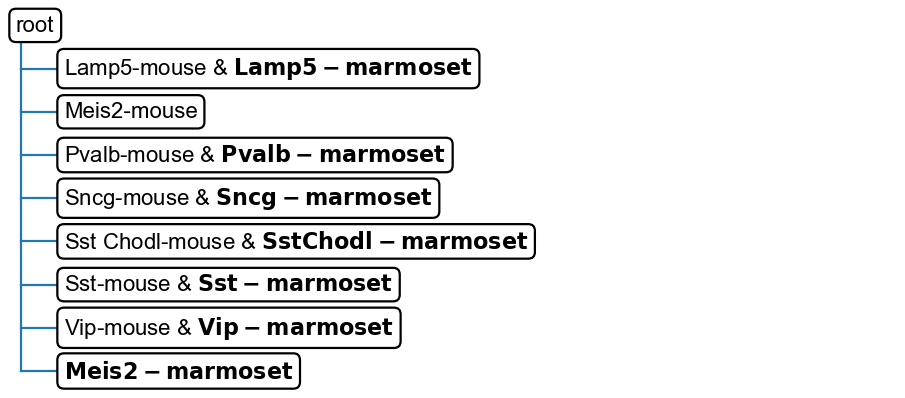


Adding dataset human to the tree

Updated tree:


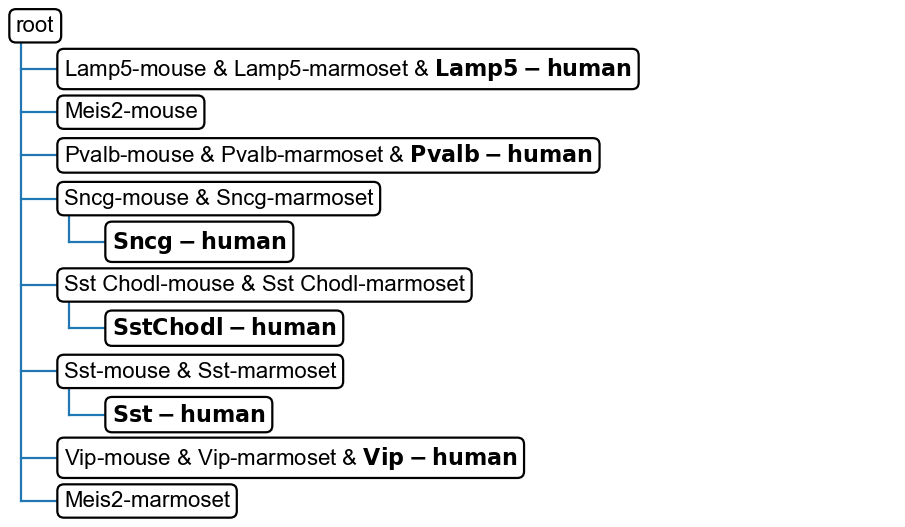

167.80462765693665


In [6]:
ks = [5, 10, 20, 50, 100]

for k in ks:
    print(k)
    
    start = tm.time()

    tree_ref, mp_ref = sca.classifiers.scHPL.learn_tree(data = latent_GABA, 
                    batch_key = 'species',
                    batch_order = ['mouse', 'marmoset', 'human'],
                    cell_type_key='subclass_batch',
                    classifier = 'knn', n_neighbors = k, dynamic_neighbors=False,
                    print_conf = False)
    print(tm.time()-start)